Gradient Boosted Machines trained on data subsets

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import glob
import os
from optichill import bas_filter

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Spring 2018 Training Data

Trained plant with 2018 February, March, and April minute data
Tested data from the rest of the year

In [2]:
lst_train = ['Plt1 m 2018-02.csv', 'Plt1 m 2018-03.csv', 'Plt1 m 2018-04.csv']
lst_test = [
    'Plt1 m 2016-11.csv', 'Plt1 m 2016-12.csv', 'Plt1 m 2017-01.csv',
    'Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv',
    'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv',
    'Plt1 m 2017-11.csv', 'Plt1 m 2017-12.csv', 'Plt1 m 2018-01.csv'
]

In [3]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Plt1', lst_train, lst_test,
    '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Plt1\\Plt1 m 2018-02.csv']
['../../Plt1\\Plt1 m 2018-03.csv']
['../../Plt1\\Plt1 m 2018-04.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 23867 points and 414 dimensions.
A CDWP3SPD_Alarm was noted and 131 datapoints were removed from the dataset.
A CDWP4Failed was noted and 131 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 1654 datapoints were removed from the dataset.
A CDWP5Failed was noted and 1654 datapoints were removed from the dataset.
A CDWP5SPD_Alarm was noted and 8686 datapoints were removed from the dataset.
A CH3_CHWSTSP_Alarm was noted and 8686 datapoints were removed from the dataset.
A CH3ALARM was noted and 8686 datapoints were removed from the dataset.
A CH3F was noted and 8686 datapoints were removed from the dataset.
A CH4_CHWSTSP_Alarm was noted and 8686 datapoints were removed f

(37913, 191)

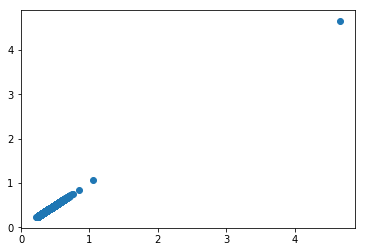

In [4]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

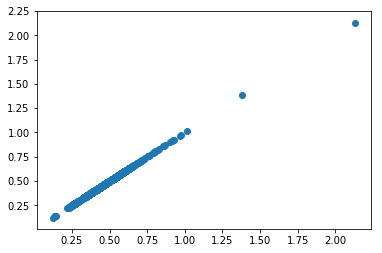

In [5]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [6]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [7]:
model = GradientBoostingRegressor(**params)

In [8]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [9]:
xtrain.shape

(14566, 190)

In [10]:
ytrain.shape

(14566,)

In [11]:
model.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
ypred = model.predict(xtest)

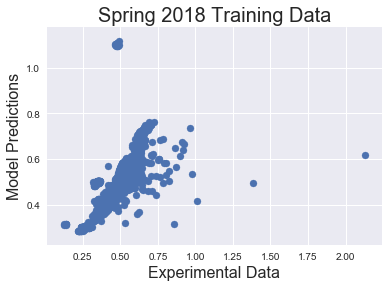

In [13]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Spring 2018 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.savefig('r2_values_spring_plt1_2018.png', bbox_inches='tight')

R2 value

In [14]:
test_score = r2_score(ytest, ypred)
test_score

0.79063436375888529

Feature Importance

In [15]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [16]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [17]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,CH5ALARM
2,0.000000,CH5_CHWSTSP_Alarm
3,0.000000,CH4SURGECNT
4,0.000000,CH4SBoolean
5,0.000000,CH4F
6,0.000000,CH4COM1S
7,0.000000,CH4CHWVLV
8,0.000000,CH4ALARM
9,0.000000,CH5AVAIL


In [18]:
df_feats.to_csv('Feat_imp_spring_test_plt1_2018.csv')